# SpecArgument Observe

## Configs

In [14]:
AUDIO_PATH: str = "../demo_data/common_voice_zh-TW_26944571.mp3"
SAMPLING_RATE: int = 16000

## Previews

In [15]:
IPython.display.Audio(AUDIO_PATH)

## Imports

In [22]:
import librosa
import IPython
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
from torchaudio.utils import download_asset

from audiopipeline.data.argumentation import spec_argument

## Common Functions

In [45]:
def visualization_spectrogram(mel_spectrogram, title="spec"):
    # Show mel-spectrogram using librosa's specshow.
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(mel_spectrogram[0, :, :], ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
    # plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()
    plt.show()

## Log-Mel Relate Visualization

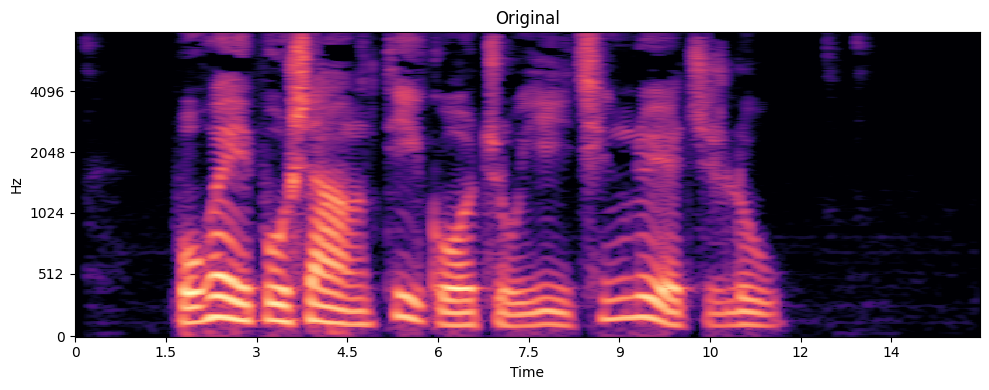

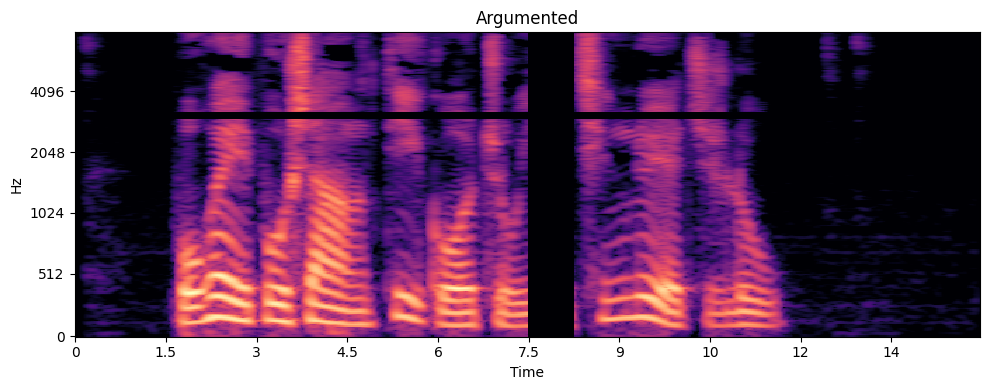

In [63]:
audio, sampling_rate = librosa.load(AUDIO_PATH)
mel_spectrogram = librosa.feature.melspectrogram(
    y=audio, sr=sampling_rate, n_mels=256, hop_length=128, fmax=8000
)
shape = mel_spectrogram.shape
original_spec = np.reshape(mel_spectrogram, (-1, shape[0], shape[1]))
argumented_spec = np.array(spec_argument(
    original_spec.tolist(),
    freq_masking_prob=0.7, 
    freq_max_masking_ratio=0.1,
    time_masking_prob=0.7,
    time_max_masking_ratio=0.1
))

visualization_spectrogram(original_spec, "Original")
visualization_spectrogram(argumented_spec, "Argumented")